In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [146]:
df = pd.read_excel("data.xlsx", sheet_name="Raw_data")
df = df[['Year', 'Married', 'Income', "Mean age", "Household", "Total", 'Income per member',]]

In [147]:
df = df[:25]
df

,Year,Married,Income,Mean age,Household,Total,Income per member
0,1993,114601,78140,25.50,96391,197254,15500
1,1994,115253,79610,25.60,97107,200800,16300
2,1995,116554,81030,25.70,98990,202732,16940
3,1996,116561,82780,25.95,99627,204624,17850
4,1997,116752,85460,25.90,101018,207235,18940
5,1998,117966,87980,25.85,102528,209291,19840
6,1999,119040,90990,26.00,103874,211676,21060
7,2000,120211,91810,25.95,104705,213774,22130
8,2001,123098,91470,26.00,108209,219035,22570
9,2002,123370,89790,26.10,109297,221458,22530


In [148]:
df.describe()

,Year,Married,Income,Mean age,Household,Total,Income per member
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2005.000000,125517.720000,89721.600000,26.690000,112143.720000,229046.720000,24412.000000
std,7.359801,6685.028917,5602.720083,0.941962,9520.963469,19449.196392,5173.445821
min,1993.000000,114601.000000,78140.000000,25.500000,96391.000000,197254.000000,15500.000000
25%,1999.000000,119040.000000,87980.000000,25.950000,103874.000000,211676.000000,21060.000000
50%,2005.000000,127142.000000,89920.000000,26.350000,113343.000000,230272.000000,24670.000000
75%,2011.000000,130767.000000,91810.000000,27.400000,119927.000000,245275.000000,27330.000000
max,2017.000000,135749.000000,103300.000000,28.450000,126224.000000,259063.000000,34640.000000


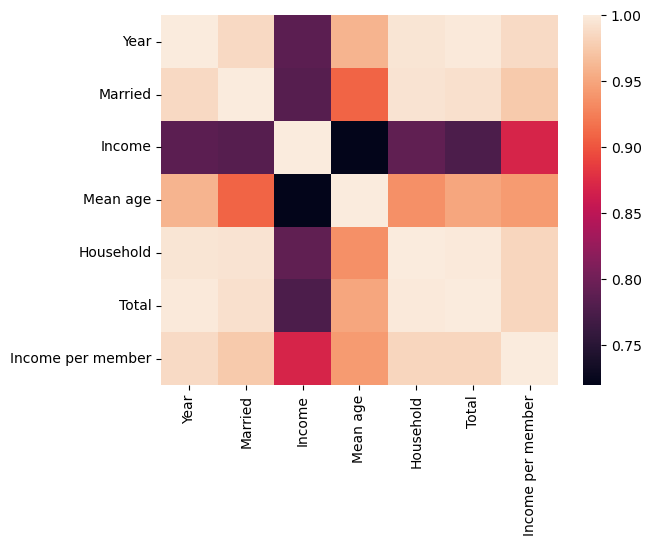

In [149]:
new = df.corr()
sns.heatmap(new)
plt.show()

In [150]:
def scale_correlation(x):
    a = 100 / 7
    b = -93 / 7
    return a * x + b

# Apply the scaling function to each element of the correlation matrix
scaled_corr_matrix = new.applymap(scale_correlation)

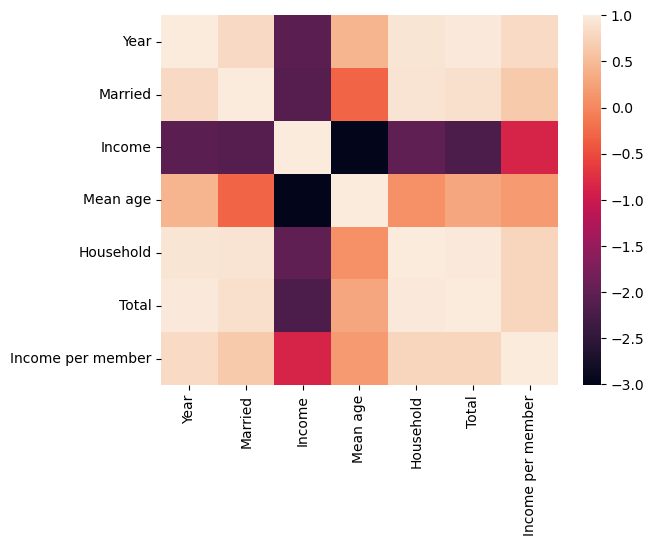

In [151]:
sns.heatmap(scaled_corr_matrix)
plt.show()

In [152]:
new

,Year,Married,Income,Mean age,Household,Total,Income per member
Year,1.000000,0.985780,0.785702,0.959830,0.995586,0.998708,0.987215
Married,0.985780,1.000000,0.782517,0.908546,0.994404,0.991485,0.975002
Income,0.785702,0.782517,1.000000,0.719628,0.789043,0.775840,0.868952
Mean age,0.959830,0.908546,0.719628,1.000000,0.935904,0.950156,0.942462
Household,0.995586,0.994404,0.789043,0.935904,1.000000,0.998158,0.984074
Total,0.998708,0.991485,0.775840,0.950156,0.998158,1.000000,0.983914
Income per member,0.987215,0.975002,0.868952,0.942462,0.984074,0.983914,1.000000


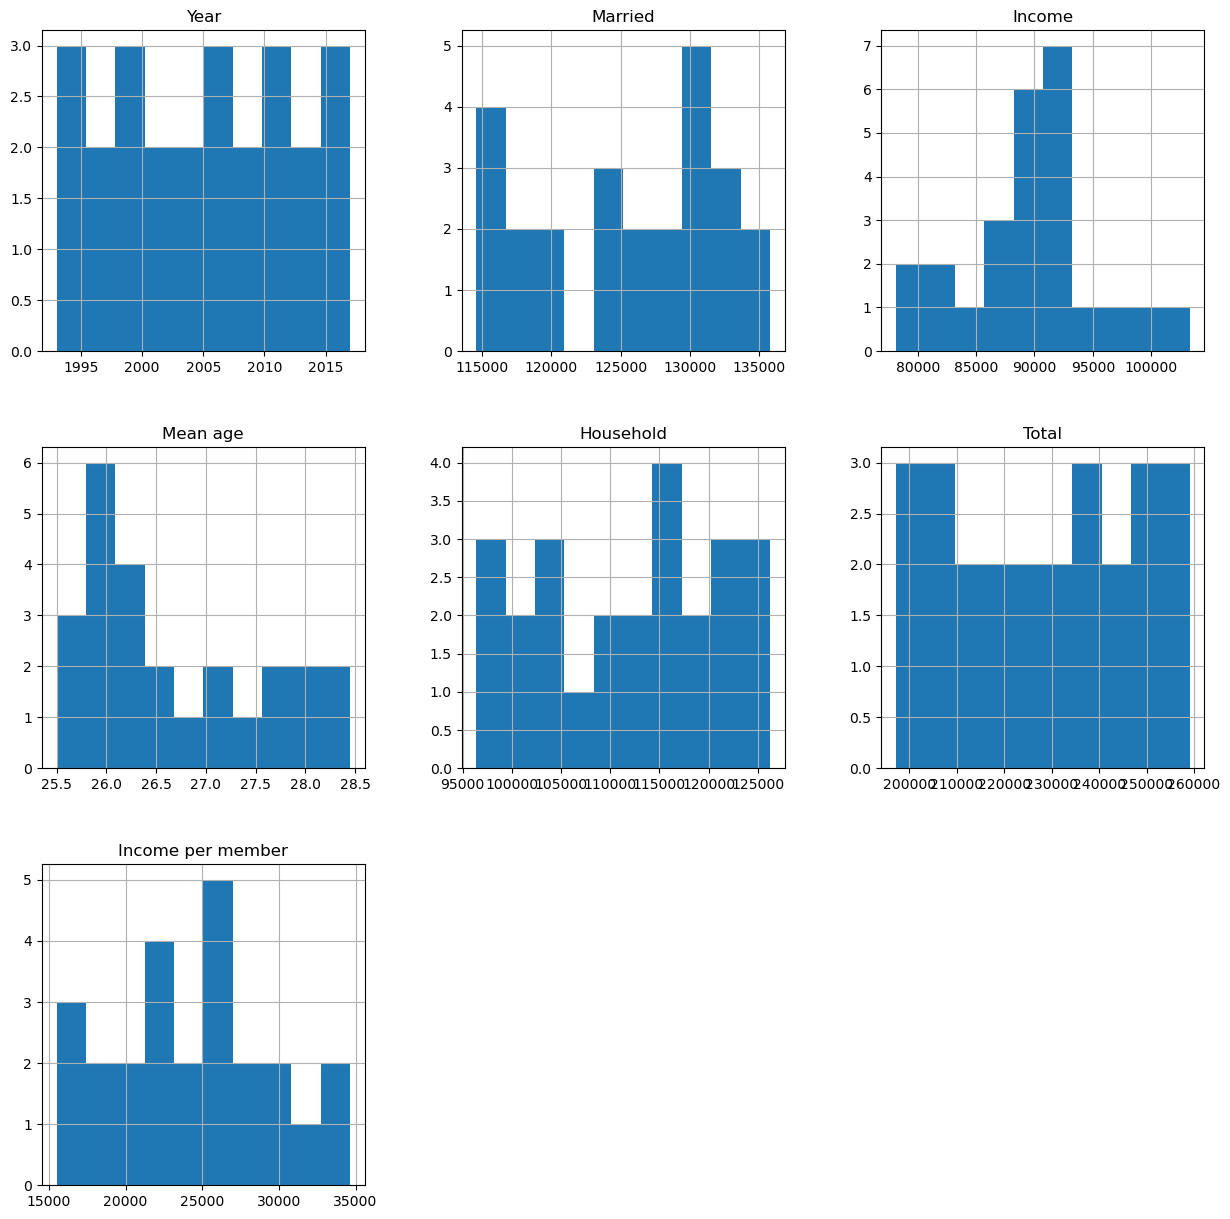

In [153]:

df.hist(figsize=(15,15), bins=10)
plt.show()

In [154]:
import warnings
import cmdstanpy
warnings.filterwarnings('ignore')
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Parameter testing

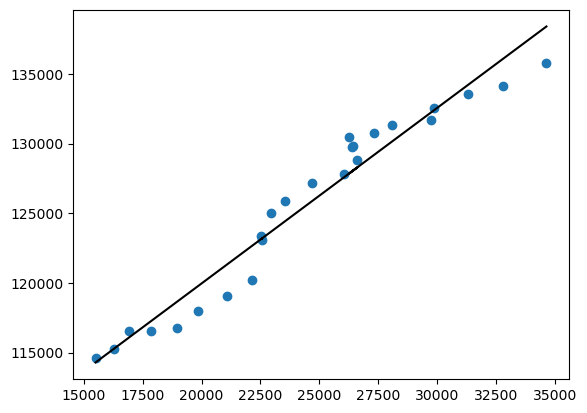

In [155]:
alpha = 1.26
beta = 94800

A = np.vstack([df['Income per member'], np.ones(len(df['Income per member']))]).T
a, b = np.linalg.lstsq(A, df['Married'], rcond=None)[0]

plt.scatter(df['Income per member'], df['Married'])
plt.plot(df['Income per member'], a*df['Income per member'] + b, color='black')


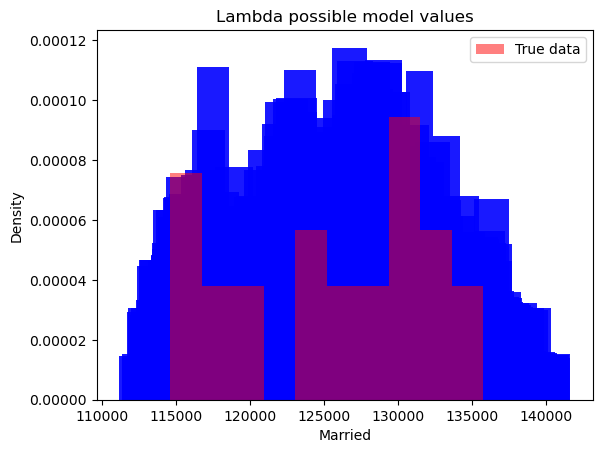

In [156]:
from numpy import random

sim = random.normal(alpha*df['Income per member'] + beta, 1500, (100,25))

for i in range(len(sim)):
    plt.hist(sim[i], color='blue', alpha = 0.9, density=True)

# sim = random.poisson(-alpha*df['Income per member'] + beta, (100,25))

# for i in range(len(sim)):
#     plt.hist(sim[i], color='green', alpha = 0.9, density=True)

plt.hist(df['Married'], color='red', bins=10, alpha = 0.5, density=True, label='True data')
plt.title('Lambda possible model values')
plt.xlabel('Married')
plt.ylabel('Density')
plt.legend()
plt.show()

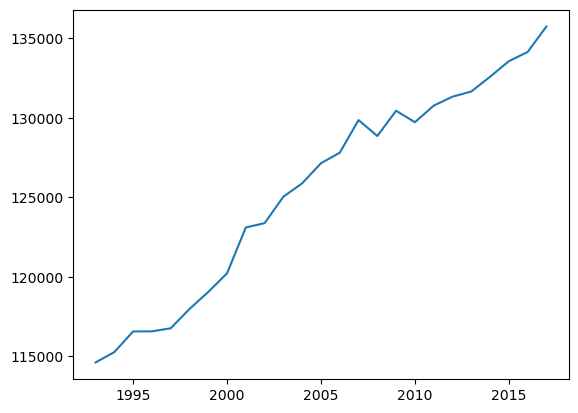

In [157]:
plt.plot(df['Year'], df['Married'])
plt.show()

# Income na małżeństwa

In [158]:
model = CmdStanModel(stan_file='test_prior.stan')
N = 25
R = 30

In [159]:
data = {'N': N, 'income': df['Income per member']}
gen_1 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

13:24:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


13:24:36 - cmdstanpy - INFO - CmdStan done processing.


In [160]:
gen_1.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23],y_sim[24],y_sim[25]
0,0.0,0.0,1.36833,96354.4,363.8660,117610.0,118153.0,119623.0,121215.0,123095.0,...,132869.0,132274.0,132493.0,133983.0,135088.0,136976.0,137248.0,138562.0,141258.0,143517.0
1,0.0,0.0,1.30723,94514.1,920.0090,115364.0,116217.0,114048.0,118800.0,119756.0,...,129539.0,127583.0,128503.0,129990.0,131911.0,133667.0,134140.0,134327.0,137372.0,139793.0
2,0.0,0.0,1.30859,96319.1,1369.8500,118216.0,119311.0,119569.0,120729.0,118866.0,...,129315.0,131678.0,133251.0,131625.0,130420.0,135758.0,135552.0,135992.0,140686.0,141617.0
3,0.0,0.0,1.27481,93623.4,1448.9200,114056.0,113217.0,114995.0,113639.0,116321.0,...,126038.0,126968.0,129143.0,128354.0,128789.0,129899.0,129919.0,135577.0,135152.0,137551.0
4,0.0,0.0,1.28421,95587.9,1441.3400,112428.0,116838.0,114093.0,117634.0,118647.0,...,128524.0,129962.0,130414.0,131389.0,129824.0,135225.0,134861.0,134208.0,139137.0,140184.0
5,0.0,0.0,1.25440,95516.4,1588.6000,115357.0,114750.0,118564.0,116937.0,119177.0,...,129235.0,126909.0,128203.0,128992.0,132839.0,131787.0,132627.0,133264.0,136298.0,140491.0
6,0.0,0.0,1.28807,96690.2,1200.1300,115455.0,115550.0,118715.0,118619.0,119441.0,...,132007.0,130187.0,131116.0,131732.0,132871.0,135483.0,137043.0,139486.0,141733.0,141598.0
7,0.0,0.0,1.25677,95355.2,615.7430,115384.0,116017.0,117177.0,118132.0,119254.0,...,128365.0,126763.0,128145.0,129220.0,130156.0,133541.0,133390.0,135025.0,137417.0,139193.0
8,0.0,0.0,1.29109,98321.7,1547.9300,118073.0,118255.0,121154.0,122357.0,123511.0,...,130221.0,131720.0,133099.0,131137.0,134658.0,134445.0,135174.0,138853.0,141658.0,141923.0
9,0.0,0.0,1.23215,92709.9,1588.1100,114305.0,114876.0,112422.0,114987.0,115828.0,...,123322.0,122590.0,124012.0,125391.0,128307.0,132825.0,129838.0,130084.0,134948.0,135123.0


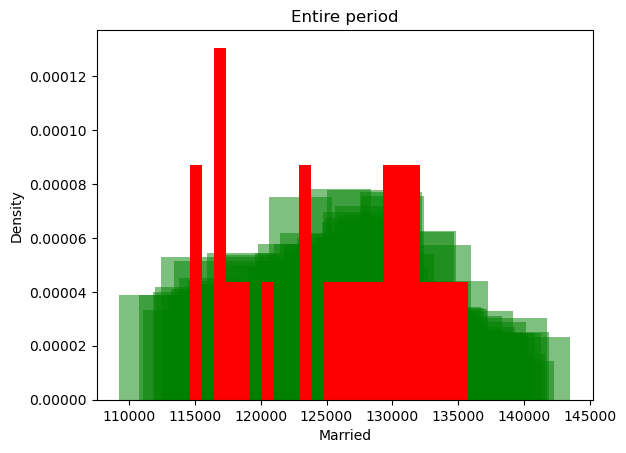

In [161]:
for i in range(R):
    plt.hist(gen_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)
plt.hist(df['Married'], bins=23, color='red', density=True)
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.show()

In [162]:
post_model = CmdStanModel(stan_file='test_posterior.stan')


13:24:36 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\test_posterior.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\test_posterior.exe
13:25:00 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\test_posterior.exe


In [163]:
data_post = {'N': N, 'y': df['Married'], 'income': df['Income per member']}
fit_1 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

13:25:01 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


13:25:01 - cmdstanpy - INFO - CmdStan done processing.


In [164]:
fit_1.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22],log_lik[23],log_lik[24],log_lik[25]
0,-6053.44,0.998851,0.202998,4.0,23.0,0.0,6055.34,0.922677,102932.0,7187.22,...,-9.81719,-9.90285,-9.85710,-9.86537,-9.85943,-9.81473,-9.84177,-9.82873,-9.80790,-9.80609
1,-6053.49,0.935246,0.202998,4.0,15.0,0.0,6056.86,0.860621,104096.0,7070.91,...,-9.81720,-9.92267,-9.86811,-9.88192,-9.87732,-9.82096,-9.86057,-9.84672,-9.81614,-9.81658
2,-6054.10,0.990924,0.202998,4.0,23.0,0.0,6055.12,0.911856,102749.0,7249.03,...,-9.83984,-9.94087,-9.88862,-9.89885,-9.89238,-9.83770,-9.87230,-9.85678,-9.82888,-9.82658
3,-6053.74,0.995866,0.202998,4.0,23.0,0.0,6056.05,0.865033,104155.0,7202.71,...,-9.82839,-9.92373,-9.87389,-9.88619,-9.88183,-9.83121,-9.86630,-9.85362,-9.82661,-9.82673
4,-6053.65,0.977887,0.202998,4.0,15.0,0.0,6054.90,0.878322,103756.0,7233.74,...,-9.83395,-9.93044,-9.88016,-9.89183,-9.88691,-9.83539,-9.87017,-9.85674,-9.82958,-9.82895
5,-6054.39,0.863441,0.202998,2.0,3.0,0.0,6055.01,0.875034,103590.0,7218.93,...,-9.84104,-9.94704,-9.89259,-9.90553,-9.90031,-9.84310,-9.88225,-9.86755,-9.83670,-9.83617
6,-6053.81,0.999929,0.202998,4.0,15.0,0.0,6054.64,0.863592,103898.0,7026.25,...,-9.81594,-9.92739,-9.87012,-9.88447,-9.87949,-9.81960,-9.86155,-9.84672,-9.81408,-9.81433
7,-6053.53,0.965817,0.202998,3.0,7.0,0.0,6054.54,0.877694,104163.0,7163.42,...,-9.81310,-9.89710,-9.85207,-9.86241,-9.85807,-9.81429,-9.84346,-9.83196,-9.80978,-9.80932
8,-6054.49,0.973954,0.202998,4.0,23.0,0.0,6056.80,0.932987,102773.0,7320.39,...,-9.83205,-9.91071,-9.86829,-9.87544,-9.86966,-9.82919,-9.85293,-9.84089,-9.82302,-9.82138
9,-6054.46,0.967301,0.202998,3.0,7.0,0.0,6055.00,0.913962,102693.0,7302.01,...,-9.84665,-9.94625,-9.89474,-9.90470,-9.89824,-9.84431,-9.87830,-9.86292,-9.83548,-9.83313


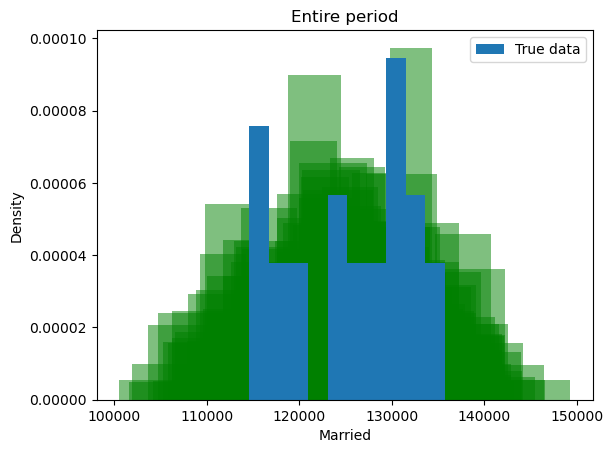

In [165]:

for i in range(R):
    plt.hist(fit_1.y_sim[i], bins=5, color='green', alpha = 0.5, density=True)

plt.hist(df['Married'], density=True, label= 'True data')
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

# Analiza

In [166]:
# az.summary(fit_1)

In [167]:
# az.plot_posterior(fit_1)
# plt.show()

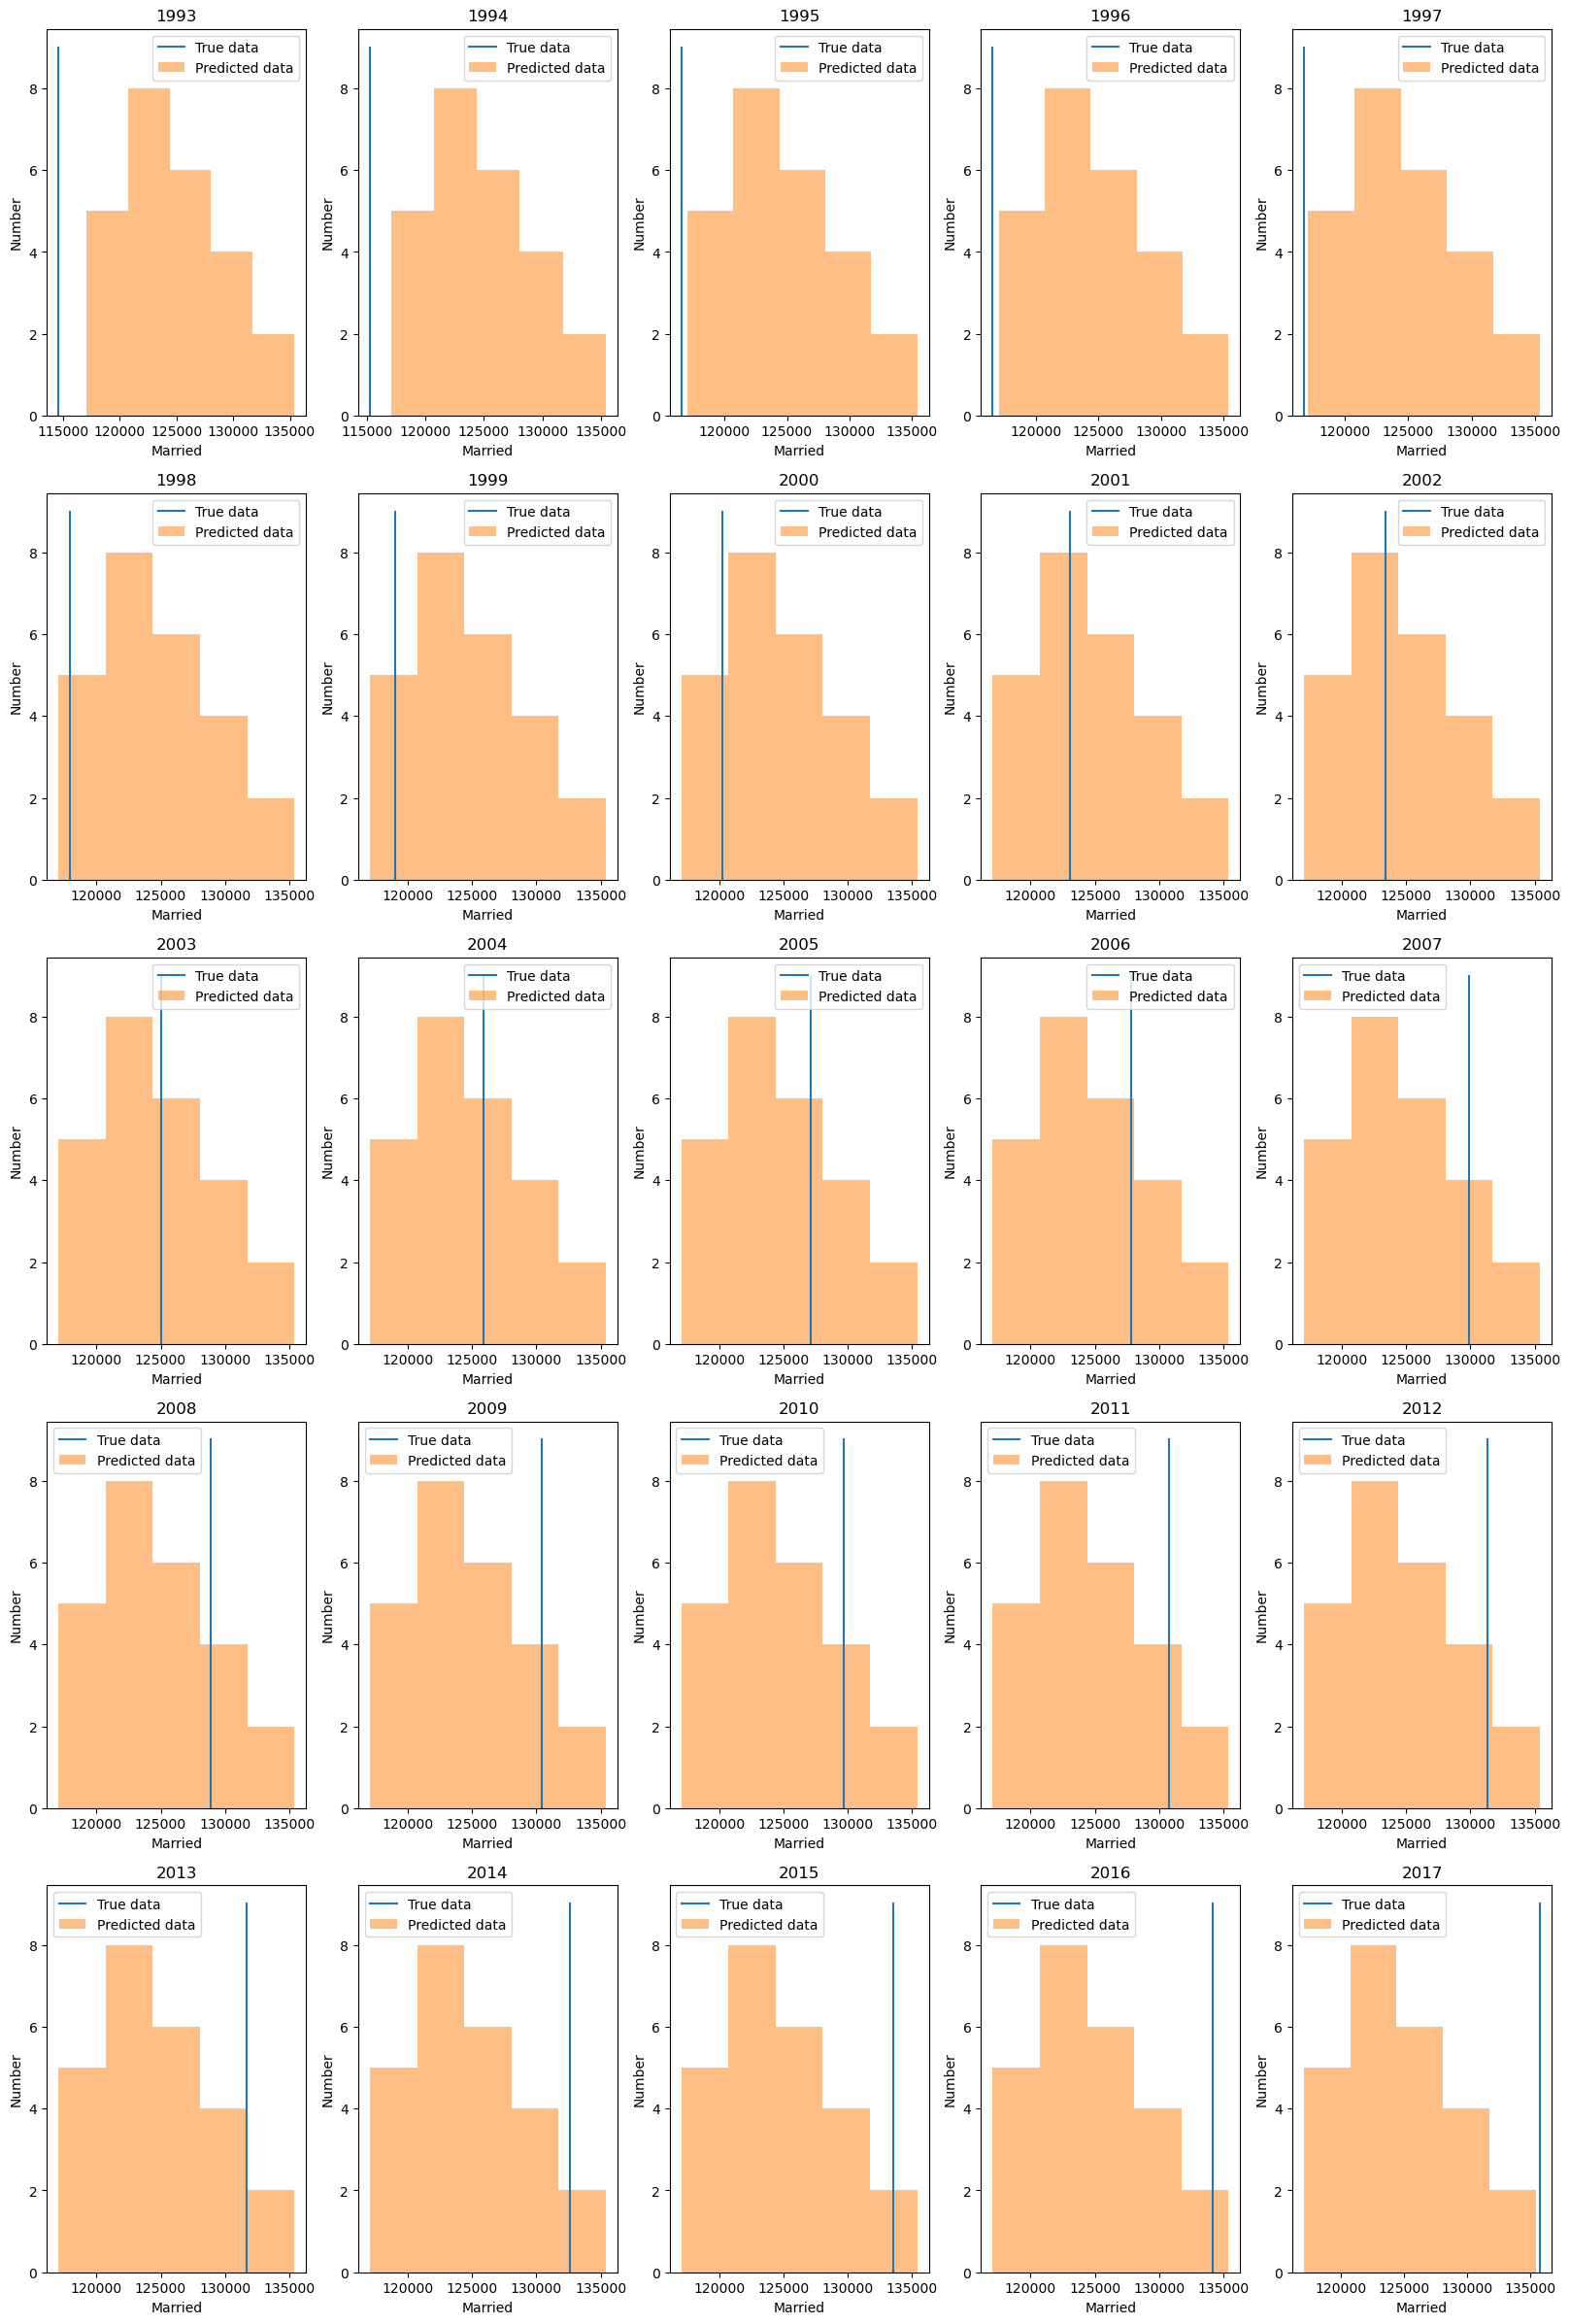

In [168]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_1.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

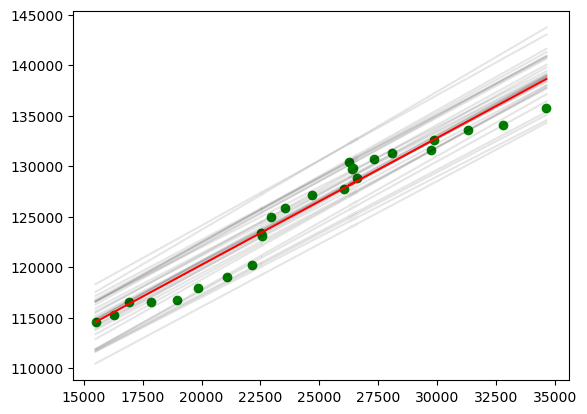

In [169]:
for i in range(len(gen_1.y_sim)):
    plt.plot(df['Income per member'], gen_1.alpha[i]*df['Income per member'] + gen_1.beta[i], color='black', alpha = 0.1)
plt.plot(df['Income per member'], gen_1.alpha[i].mean()*df['Income per member'] + gen_1.beta.mean(), color='red')   
plt.scatter(df['Income per member'], df['Married'], color='green')
plt.show()

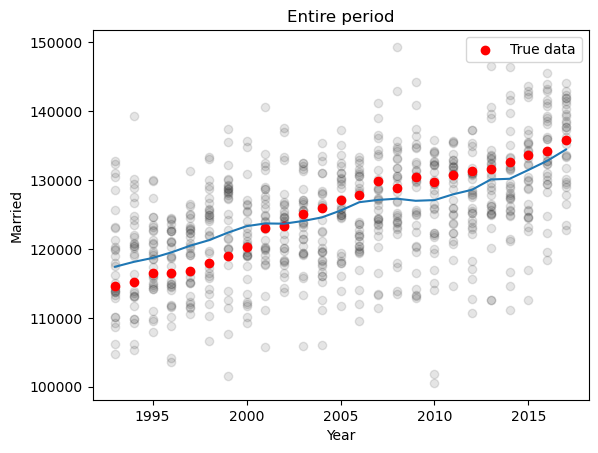

In [170]:
for i in range(len(fit_1.y_sim)):
    plt.scatter(df['Year'], fit_1.y_sim[i], alpha = 0.1, color="black")
plt.scatter(df['Year'], df['Married'], label= 'True data', color="red")
plt.plot(df['Year'], fit_1.alpha.mean()*df['Income per member'] + fit_1.beta.mean())
plt.title('Entire period')
plt.ylabel('Married')
plt.xlabel('Year')
plt.legend()
plt.show()

# Income i Household na ilość małżeństw

In [171]:
from numpy import random
alpha = 0.8
beta = 108000

sim = random.normal(alpha*df['Income'] + beta, 1500, 23)


plt.plot(df['Income'], alpha*df['Income'] + beta, color='black')

plt.plot(df['Income'], df['Married'],'.')
plt.title('Lambda possible model values')
plt.xlabel('Income')
plt.ylabel('Married')
plt.legend()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (23,) and arg 1 with shape (25,).

In [ ]:
model = CmdStanModel(stan_file='model_prior.stan')
data = {'N': N, 'income': df['Income']}
gen_2 = model.sample(
                    data=data,
                    iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True)

16:16:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


16:16:41 - cmdstanpy - INFO - CmdStan done processing.


In [ ]:
gen_2.draws_pd()

,lp__,accept_stat__,alpha,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.864351,108451.0,1521.960,144322.0,143956.0,143692.0,137280.0,136841.0,...,132042.0,131503.0,130822.0,130447.0,126881.0,133230.0,129066.0,127324.0,128463.0,125166.0
1,0.0,0.0,0.807157,103595.0,1859.770,137222.0,137757.0,133021.0,132534.0,133949.0,...,124008.0,129319.0,125458.0,121811.0,124138.0,121838.0,122612.0,124127.0,122676.0,123540.0
2,0.0,0.0,0.753695,108447.0,754.273,140756.0,139808.0,136065.0,133766.0,133458.0,...,128807.0,128149.0,127498.0,129351.0,126326.0,126495.0,126466.0,125154.0,125321.0,123931.0
3,0.0,0.0,0.746259,107623.0,378.525,138822.0,137769.0,136210.0,133611.0,133838.0,...,127463.0,128055.0,127395.0,126494.0,125959.0,124478.0,125624.0,125096.0,124975.0,123373.0
4,0.0,0.0,0.853654,109772.0,1232.020,145606.0,144540.0,145398.0,138676.0,141471.0,...,131913.0,130887.0,132175.0,133509.0,130958.0,130095.0,129478.0,128347.0,130313.0,128422.0
5,0.0,0.0,1.011060,105844.0,574.466,148726.0,147107.0,145544.0,143162.0,141121.0,...,131155.0,132034.0,131998.0,132299.0,130268.0,129115.0,129303.0,128261.0,128395.0,127439.0
6,0.0,0.0,0.931000,110408.0,1158.140,148795.0,148366.0,146429.0,144076.0,143158.0,...,134136.0,135015.0,134717.0,136618.0,132039.0,131023.0,131466.0,130574.0,130741.0,129990.0
7,0.0,0.0,0.755551,111994.0,1046.120,143453.0,142836.0,141672.0,139535.0,138002.0,...,133745.0,134113.0,132477.0,132732.0,129206.0,128709.0,130055.0,130681.0,129431.0,128800.0
8,0.0,0.0,0.728586,108984.0,1037.630,140021.0,138199.0,138720.0,133947.0,134794.0,...,127801.0,127615.0,127653.0,127582.0,127770.0,125771.0,124914.0,125796.0,126826.0,125522.0
9,0.0,0.0,0.537287,107243.0,446.255,130364.0,128492.0,127872.0,126480.0,125349.0,...,122254.0,120502.0,121544.0,121394.0,120657.0,119778.0,119293.0,119962.0,118427.0,119239.0


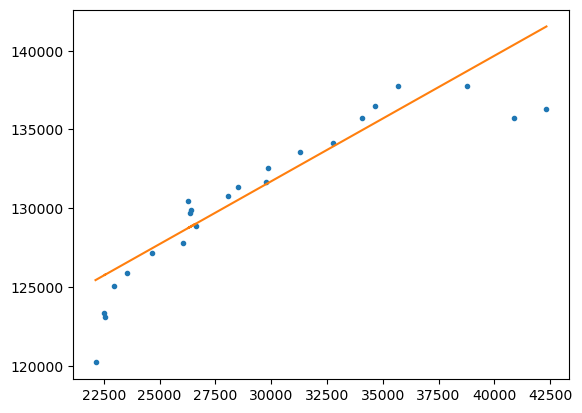

In [ ]:
alpha = np.mean(gen_2.alpha)
beta = np.mean(gen_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

In [ ]:
post_model = CmdStanModel(stan_file='model.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income']}
fit_2 = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

16:16:42 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


16:16:42 - cmdstanpy - INFO - CmdStan done processing.


In [ ]:
fit_2.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22],log_lik[23]
0,-4844.00,0.990053,0.140468,2.0,7.0,0.0,4845.14,0.195653,124738.0,4649.10,...,-9.37083,-9.39082,-9.36342,-9.45859,-9.49917,-9.64123,-9.77109,-10.13520,-10.2118,-11.1780
1,-4844.49,0.978986,0.140468,5.0,31.0,0.0,4844.69,0.252016,122941.0,4802.67,...,-9.41284,-9.40945,-9.39735,-9.45844,-9.48395,-9.59038,-9.69188,-9.99299,-10.0589,-10.8916
2,-4845.02,0.841047,0.140468,4.0,31.0,0.0,4847.14,0.256163,123200.0,4776.53,...,-9.39626,-9.41996,-9.39066,-9.48398,-9.51427,-9.63671,-9.74985,-10.07800,-10.1490,-11.0331
3,-4844.44,0.985141,0.140468,2.0,7.0,0.0,4845.52,0.257866,122921.0,4784.36,...,-9.40435,-9.41086,-9.39240,-9.46537,-9.49216,-9.60386,-9.70920,-10.01980,-10.0877,-10.9395
4,-4844.66,0.972099,0.140468,5.0,31.0,0.0,4845.32,0.234717,123718.0,4899.63,...,-9.42244,-9.44144,-9.41592,-9.50131,-9.53245,-9.65172,-9.76172,-10.07740,-10.1451,-10.9926
5,-4844.76,0.889400,0.140468,5.0,31.0,0.0,4846.00,0.244049,123063.0,4750.24,...,-9.40582,-9.39581,-9.38760,-9.44262,-9.46843,-9.57517,-9.67764,-9.98208,-10.0487,-10.8941
6,-4845.21,0.991983,0.140468,5.0,31.0,0.0,4846.34,0.175453,125336.0,4821.54,...,-9.40519,-9.42821,-9.40005,-9.49469,-9.53661,-9.67663,-9.80340,-10.15320,-10.2260,-11.1449
7,-4844.78,0.981528,0.140468,2.0,7.0,0.0,4845.93,0.183026,125225.0,4783.29,...,-9.39554,-9.42546,-9.39271,-9.49638,-9.53940,-9.68387,-9.81404,-10.17300,-10.2477,-11.1875
8,-4844.15,0.997722,0.140468,4.0,15.0,0.0,4845.18,0.191856,124818.0,4632.05,...,-9.36776,-9.38627,-9.35971,-9.45381,-9.49491,-9.63801,-9.76894,-10.13560,-10.2126,-11.1859
9,-4844.08,0.947756,0.140468,2.0,3.0,0.0,4844.51,0.195057,124797.0,4636.82,...,-9.36713,-9.39054,-9.36091,-9.46057,-9.50224,-9.64730,-9.77945,-10.14880,-10.2264,-11.2038


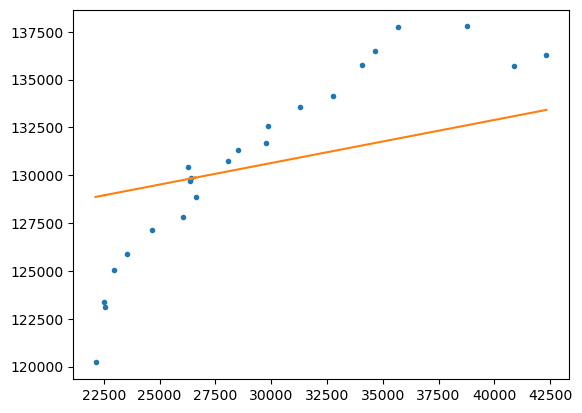

In [ ]:
alpha = np.mean(fit_2.alpha)
beta = np.mean(fit_2.beta)
plt.plot(df['Income'], df['Married'],'.')
plt.plot(df['Income'], alpha*df['Income'] + beta) 
plt.show()

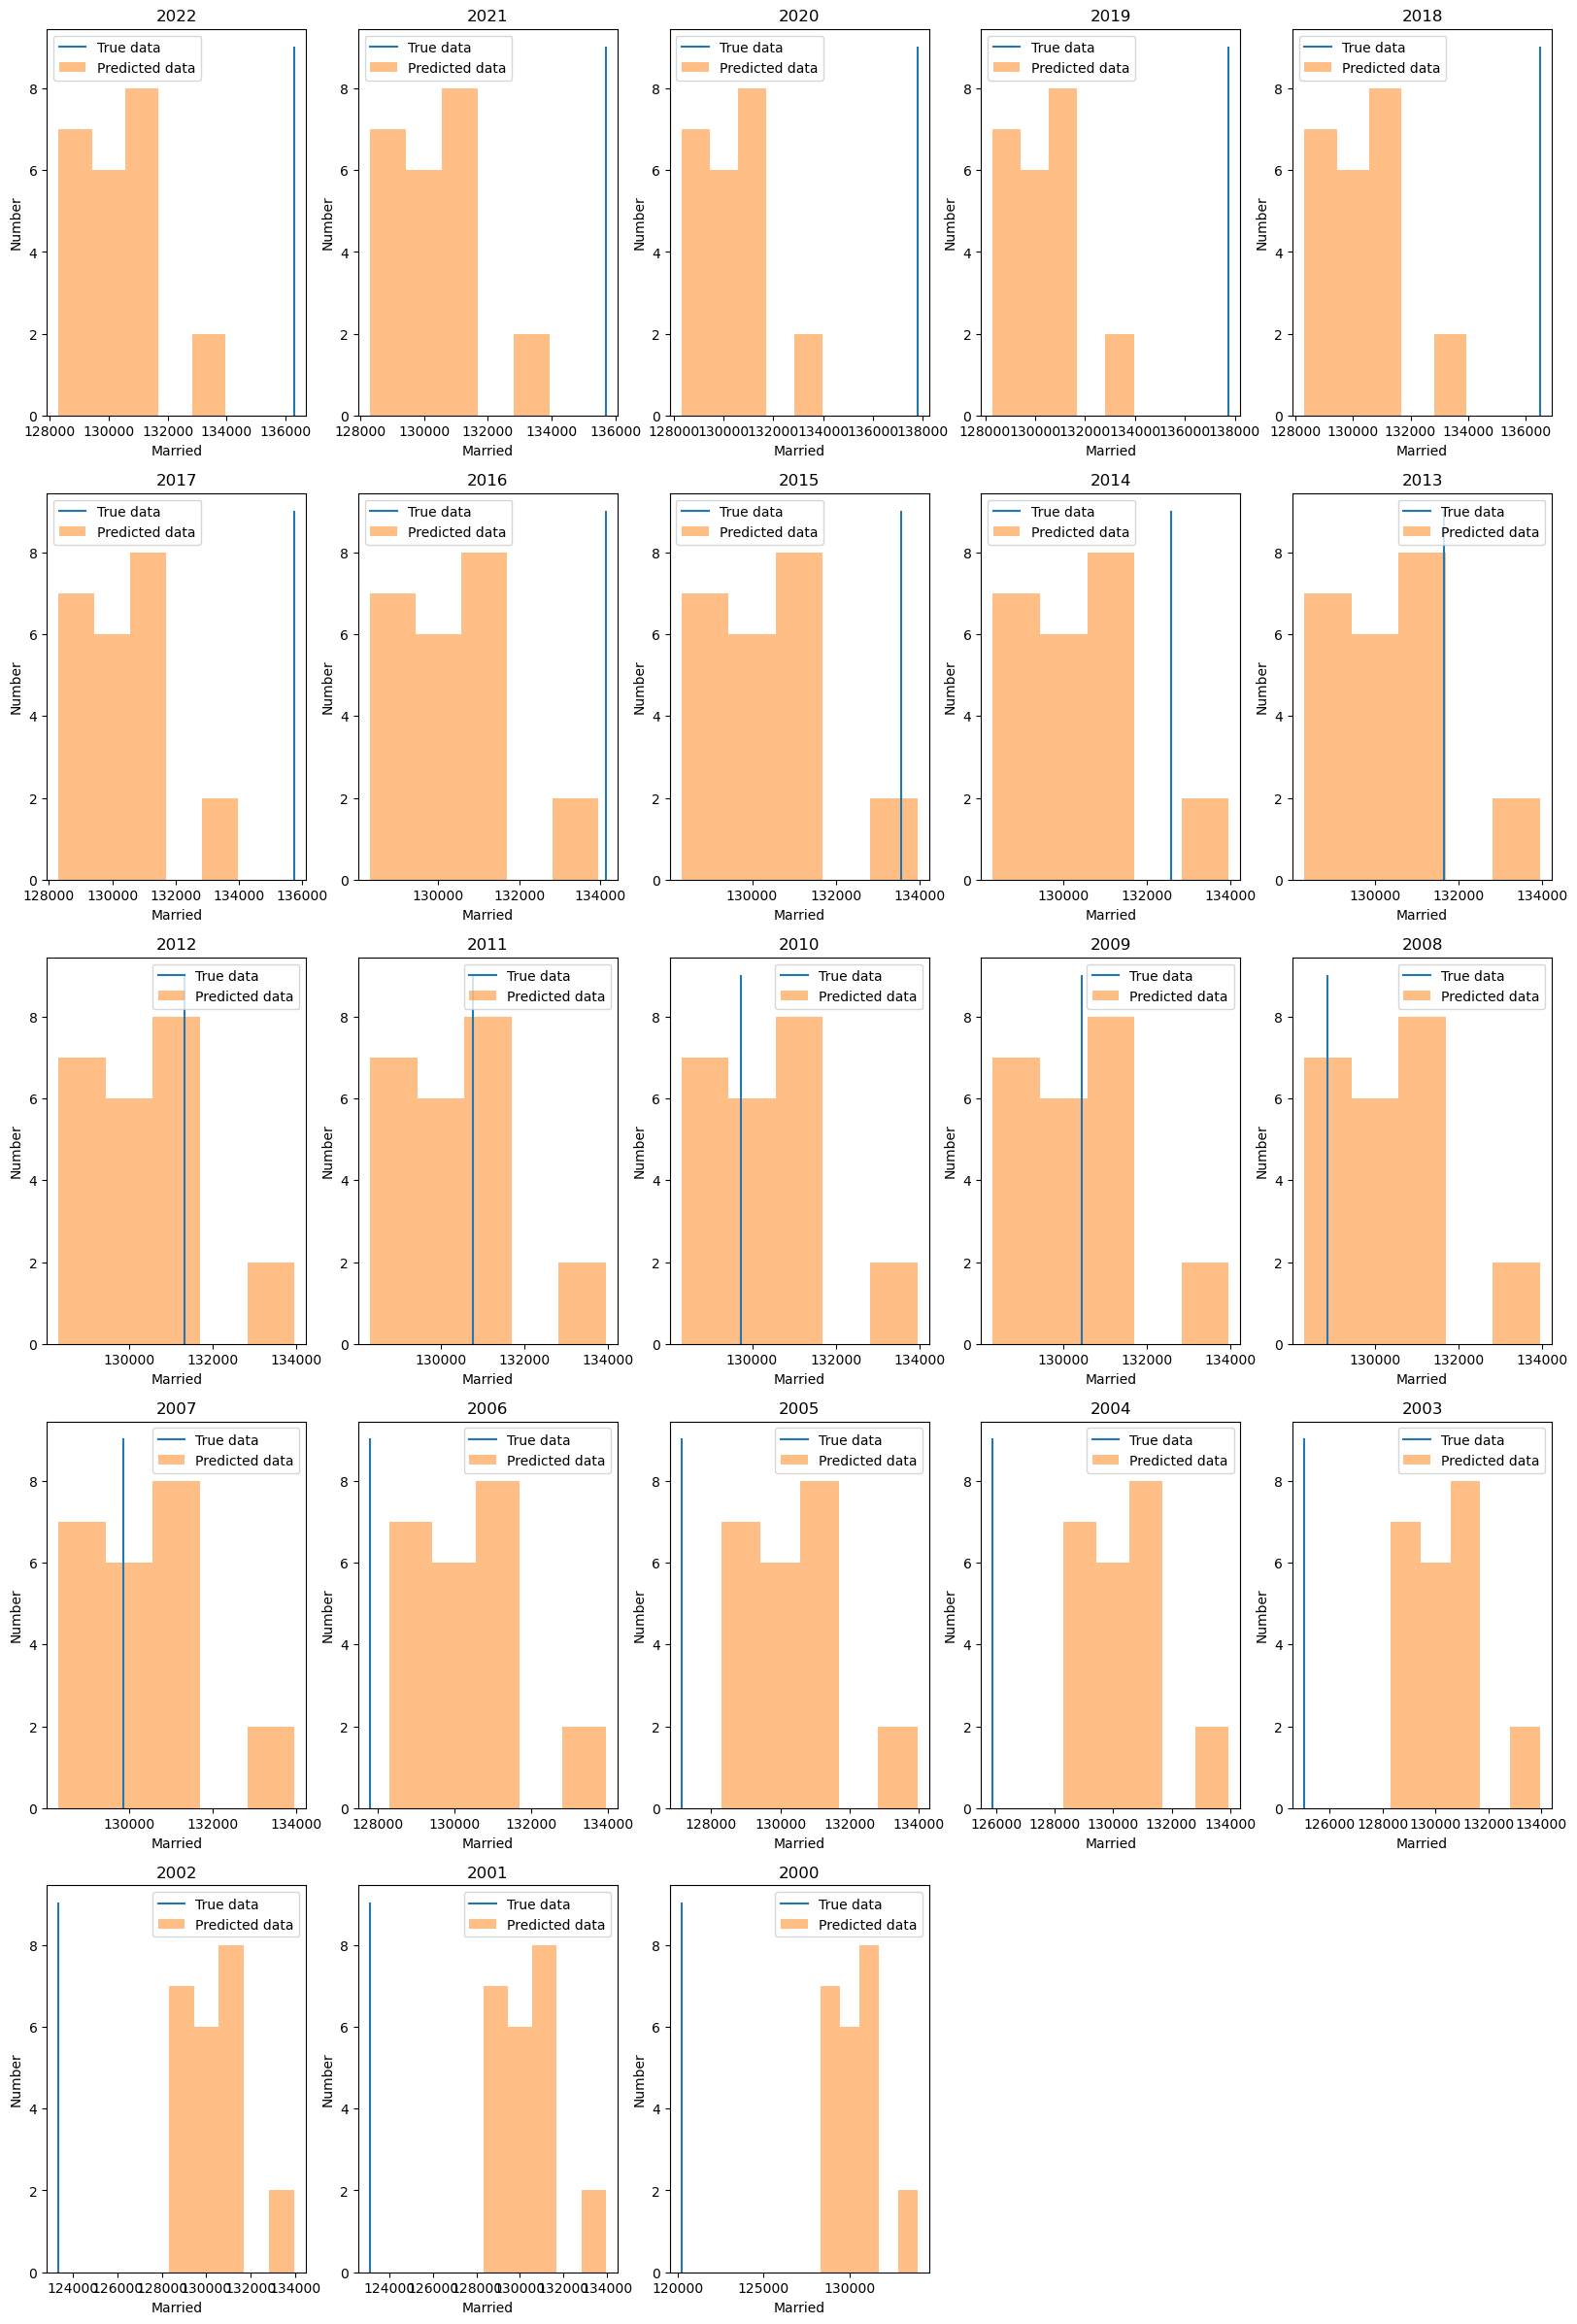

In [ ]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_2.y_sim.mean(0), bins=5, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()

# Trimodel

In [ ]:
model = CmdStanModel(stan_file='test_prior.stan')
data = {'N': N, 'income': df['Income per member']}
gen_tri = model.sample(
                    data=data,
                    iter_sampling=R,
                    iter_warmup=0,
                    chains=1,
                    fixed_param=True)

NameError: name 'CmdStanModel' is not defined

In [ ]:
gen_tri.draws_pd()

,lp__,accept_stat__,alpha_1,alpha_2,beta,sigma,y_sim[1],y_sim[2],y_sim[3],y_sim[4],...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,0.0,0.0,0.125956,0.730000,39107.9,0.595086,129554.0,128295.0,127995.0,128474.0,...,121341.0,121008.0,120470.0,119329.0,118741.0,117902.0,117448.0,116056.0,115258.0,112755.0
1,0.0,0.0,0.120126,0.741640,40712.7,0.421916,132933.0,131642.0,131321.0,131784.0,...,124464.0,124127.0,123578.0,122417.0,121809.0,120948.0,120482.0,119065.0,118253.0,115708.0
2,0.0,0.0,0.165777,0.702274,41699.8,1.044820,126822.0,125678.0,125481.0,126079.0,...,119639.0,119301.0,118793.0,117712.0,117207.0,116449.0,116040.0,114720.0,113950.0,111562.0
3,0.0,0.0,0.163359,0.673185,39081.4,0.557434,120490.0,119398.0,119221.0,119806.0,...,113674.0,113350.0,112864.0,111829.0,111353.0,110631.0,110240.0,108979.0,108239.0,105952.0
4,0.0,0.0,0.184545,0.823893,35869.7,1.766330,136154.0,134796.0,134548.0,135219.0,...,127566.0,127177.0,126578.0,125305.0,124697.0,123798.0,123314.0,121761.0,120858.0,118051.0
5,0.0,0.0,0.135129,0.811367,37414.9,1.260730,138146.0,136742.0,136397.0,136915.0,...,128942.0,128574.0,127973.0,126706.0,126044.0,125107.0,124601.0,123049.0,122164.0,119379.0
6,0.0,0.0,0.110791,0.701372,40169.7,1.089400,127501.0,126276.0,125970.0,126397.0,...,119445.0,119132.0,118611.0,117510.0,116930.0,116113.0,115672.0,114331.0,113563.0,111155.0
7,0.0,0.0,0.148161,0.732828,38951.5,0.597751,128829.0,127596.0,127341.0,127889.0,...,120932.0,120591.0,120055.0,118917.0,118358.0,117538.0,117097.0,115709.0,114906.0,112405.0
8,0.0,0.0,0.191000,0.817532,41381.2,0.470027,140558.0,139222.0,138991.0,139679.0,...,132163.0,131772.0,131180.0,129920.0,129331.0,128448.0,127968.0,126432.0,125535.0,122754.0
9,0.0,0.0,0.160480,0.750449,38756.1,0.610274,130423.0,129176.0,128931.0,129519.0,...,122480.0,122126.0,121577.0,120416.0,119855.0,119027.0,118578.0,117162.0,116340.0,113780.0


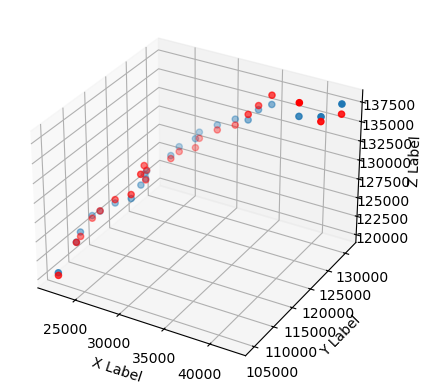

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
x = df['Income']
y = df['Household']
z = df['Married']


# Compute coefficients of the linear regression line manually
X = np.column_stack((np.ones_like(x), x, y))  # Add a column of ones for the intercept
coefficients = np.linalg.lstsq(X, z, rcond=None)[0]

# Extract coefficients
intercept, slope_x, slope_y = coefficients

# Define points for the line
z_line = intercept + slope_x * df['Income'] + slope_y * df['Household']

# # Plotting the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o')
ax.scatter(x, y, z_line)

# # # Plotting the linear regression line
# ax.plot_surface(x_line, y_line, z_line, alpha=0.5)

# Labeling the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

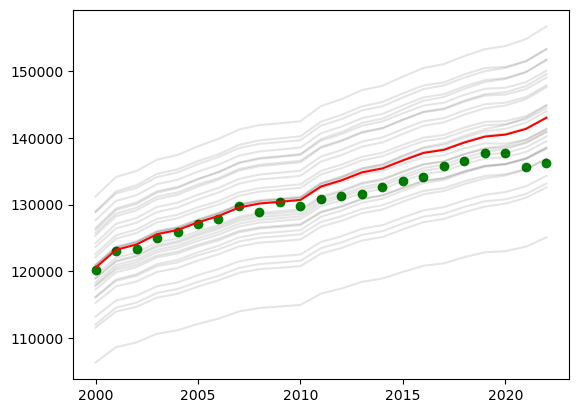

In [ ]:
for i in range(len(gen_tri.y_sim)):
    plt.plot(df['Year'], gen_tri.alpha_1[i]*df['Income'] + gen_tri.alpha_2[i]*df['Household'] + gen_tri.beta[i], color='black', alpha = 0.1)
plt.plot(df['Year'], gen_tri.alpha_1.mean()*df['Income'] + gen_tri.alpha_2.mean()*df['Household'] + gen_tri.beta.mean(), color='red')   
plt.scatter(df['Year'], df['Married'], color='green')
plt.show()

In [ ]:
post_model = CmdStanModel(stan_file='test_posterior.stan')
data_post = {'N': N, 'y': df['Married'], 'income': df['Income'], 'household': df['Household']}
fit_tri = post_model.sample(
                    data=data_post,chains=1,
                    iter_sampling=R)

16:17:06 - cmdstanpy - INFO - compiling stan file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model_posterior.stan to exe file C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model_posterior.exe
16:17:26 - cmdstanpy - INFO - compiled model executable: C:\Users\Julia\Desktop\Data analysis\Project\DA_project\triparam_model_posterior.exe
16:17:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                     


16:17:29 - cmdstanpy - INFO - CmdStan done processing.


In [ ]:
fit_tri.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha_1,alpha_2,beta,...,y_sim[14],y_sim[15],y_sim[16],y_sim[17],y_sim[18],y_sim[19],y_sim[20],y_sim[21],y_sim[22],y_sim[23]
0,-115944.0,0.956855,0.000188,9.0,587.0,0.0,115946.0,0.075686,0.067829,124779.0,...,130788.0,130272.0,130536.0,130205.0,131000.0,130516.0,130309.0,130353.0,129555.0,130603.0
1,-115944.0,0.997116,0.000188,9.0,543.0,0.0,115944.0,0.082015,0.070729,124616.0,...,130535.0,130550.0,130793.0,130400.0,130902.0,130661.0,131027.0,130321.0,130796.0,130843.0
2,-115945.0,0.925723,0.000188,5.0,59.0,0.0,115947.0,0.079442,0.071684,124443.0,...,129767.0,131208.0,130357.0,130927.0,130464.0,130624.0,130928.0,129823.0,130108.0,130516.0
3,-115945.0,0.913271,0.000188,7.0,191.0,0.0,115949.0,0.076702,0.066884,124915.0,...,131068.0,130392.0,130726.0,130368.0,130542.0,130346.0,130312.0,130517.0,130295.0,130291.0
4,-115947.0,0.973814,0.000188,6.0,127.0,0.0,115948.0,0.071924,0.066012,124877.0,...,131077.0,131350.0,130993.0,130568.0,130544.0,130369.0,131187.0,130652.0,130562.0,130334.0
5,-115945.0,0.959190,0.000188,7.0,191.0,0.0,115948.0,0.075696,0.067666,124810.0,...,130865.0,130954.0,130956.0,130735.0,130370.0,130782.0,130492.0,130559.0,129828.0,130010.0
6,-115945.0,0.947786,0.000188,7.0,191.0,0.0,115949.0,0.084976,0.070527,124717.0,...,130973.0,130923.0,130688.0,130273.0,130464.0,130570.0,130634.0,130555.0,130128.0,130145.0
7,-115943.0,0.999668,0.000188,7.0,251.0,0.0,115947.0,0.081358,0.072776,124358.0,...,131128.0,130861.0,130269.0,130728.0,130926.0,130841.0,130045.0,130642.0,130295.0,129516.0
8,-115943.0,0.908923,0.000188,7.0,211.0,0.0,115944.0,0.083407,0.072523,124426.0,...,131216.0,130104.0,130762.0,130527.0,130533.0,130120.0,129686.0,130607.0,130384.0,129798.0
9,-115945.0,0.998400,0.000188,8.0,319.0,0.0,115946.0,0.076198,0.069079,124637.0,...,130567.0,130350.0,130946.0,129933.0,130778.0,130357.0,130071.0,130334.0,130514.0,130620.0


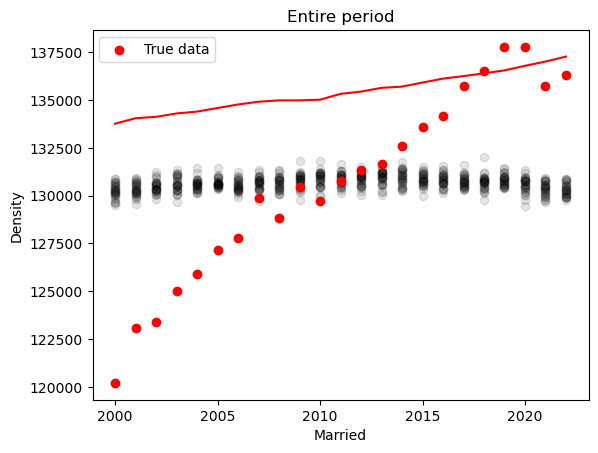

In [ ]:
for i in range(len(fit_tri.y_sim)):
    plt.scatter(df['Year'], fit_tri.y_sim[i], alpha = 0.1, color="black")
plt.scatter(df['Year'], df['Married'], label= 'True data', color="red")
plt.plot(df['Year'], fit_tri.alpha_1.mean()*df['Income'] + fit_tri.alpha_2.mean()*df['Household'] + fit_tri.beta.mean(), color='red')   
plt.title('Entire period')
plt.ylabel('Density')
plt.xlabel('Married')
plt.legend()
plt.show()

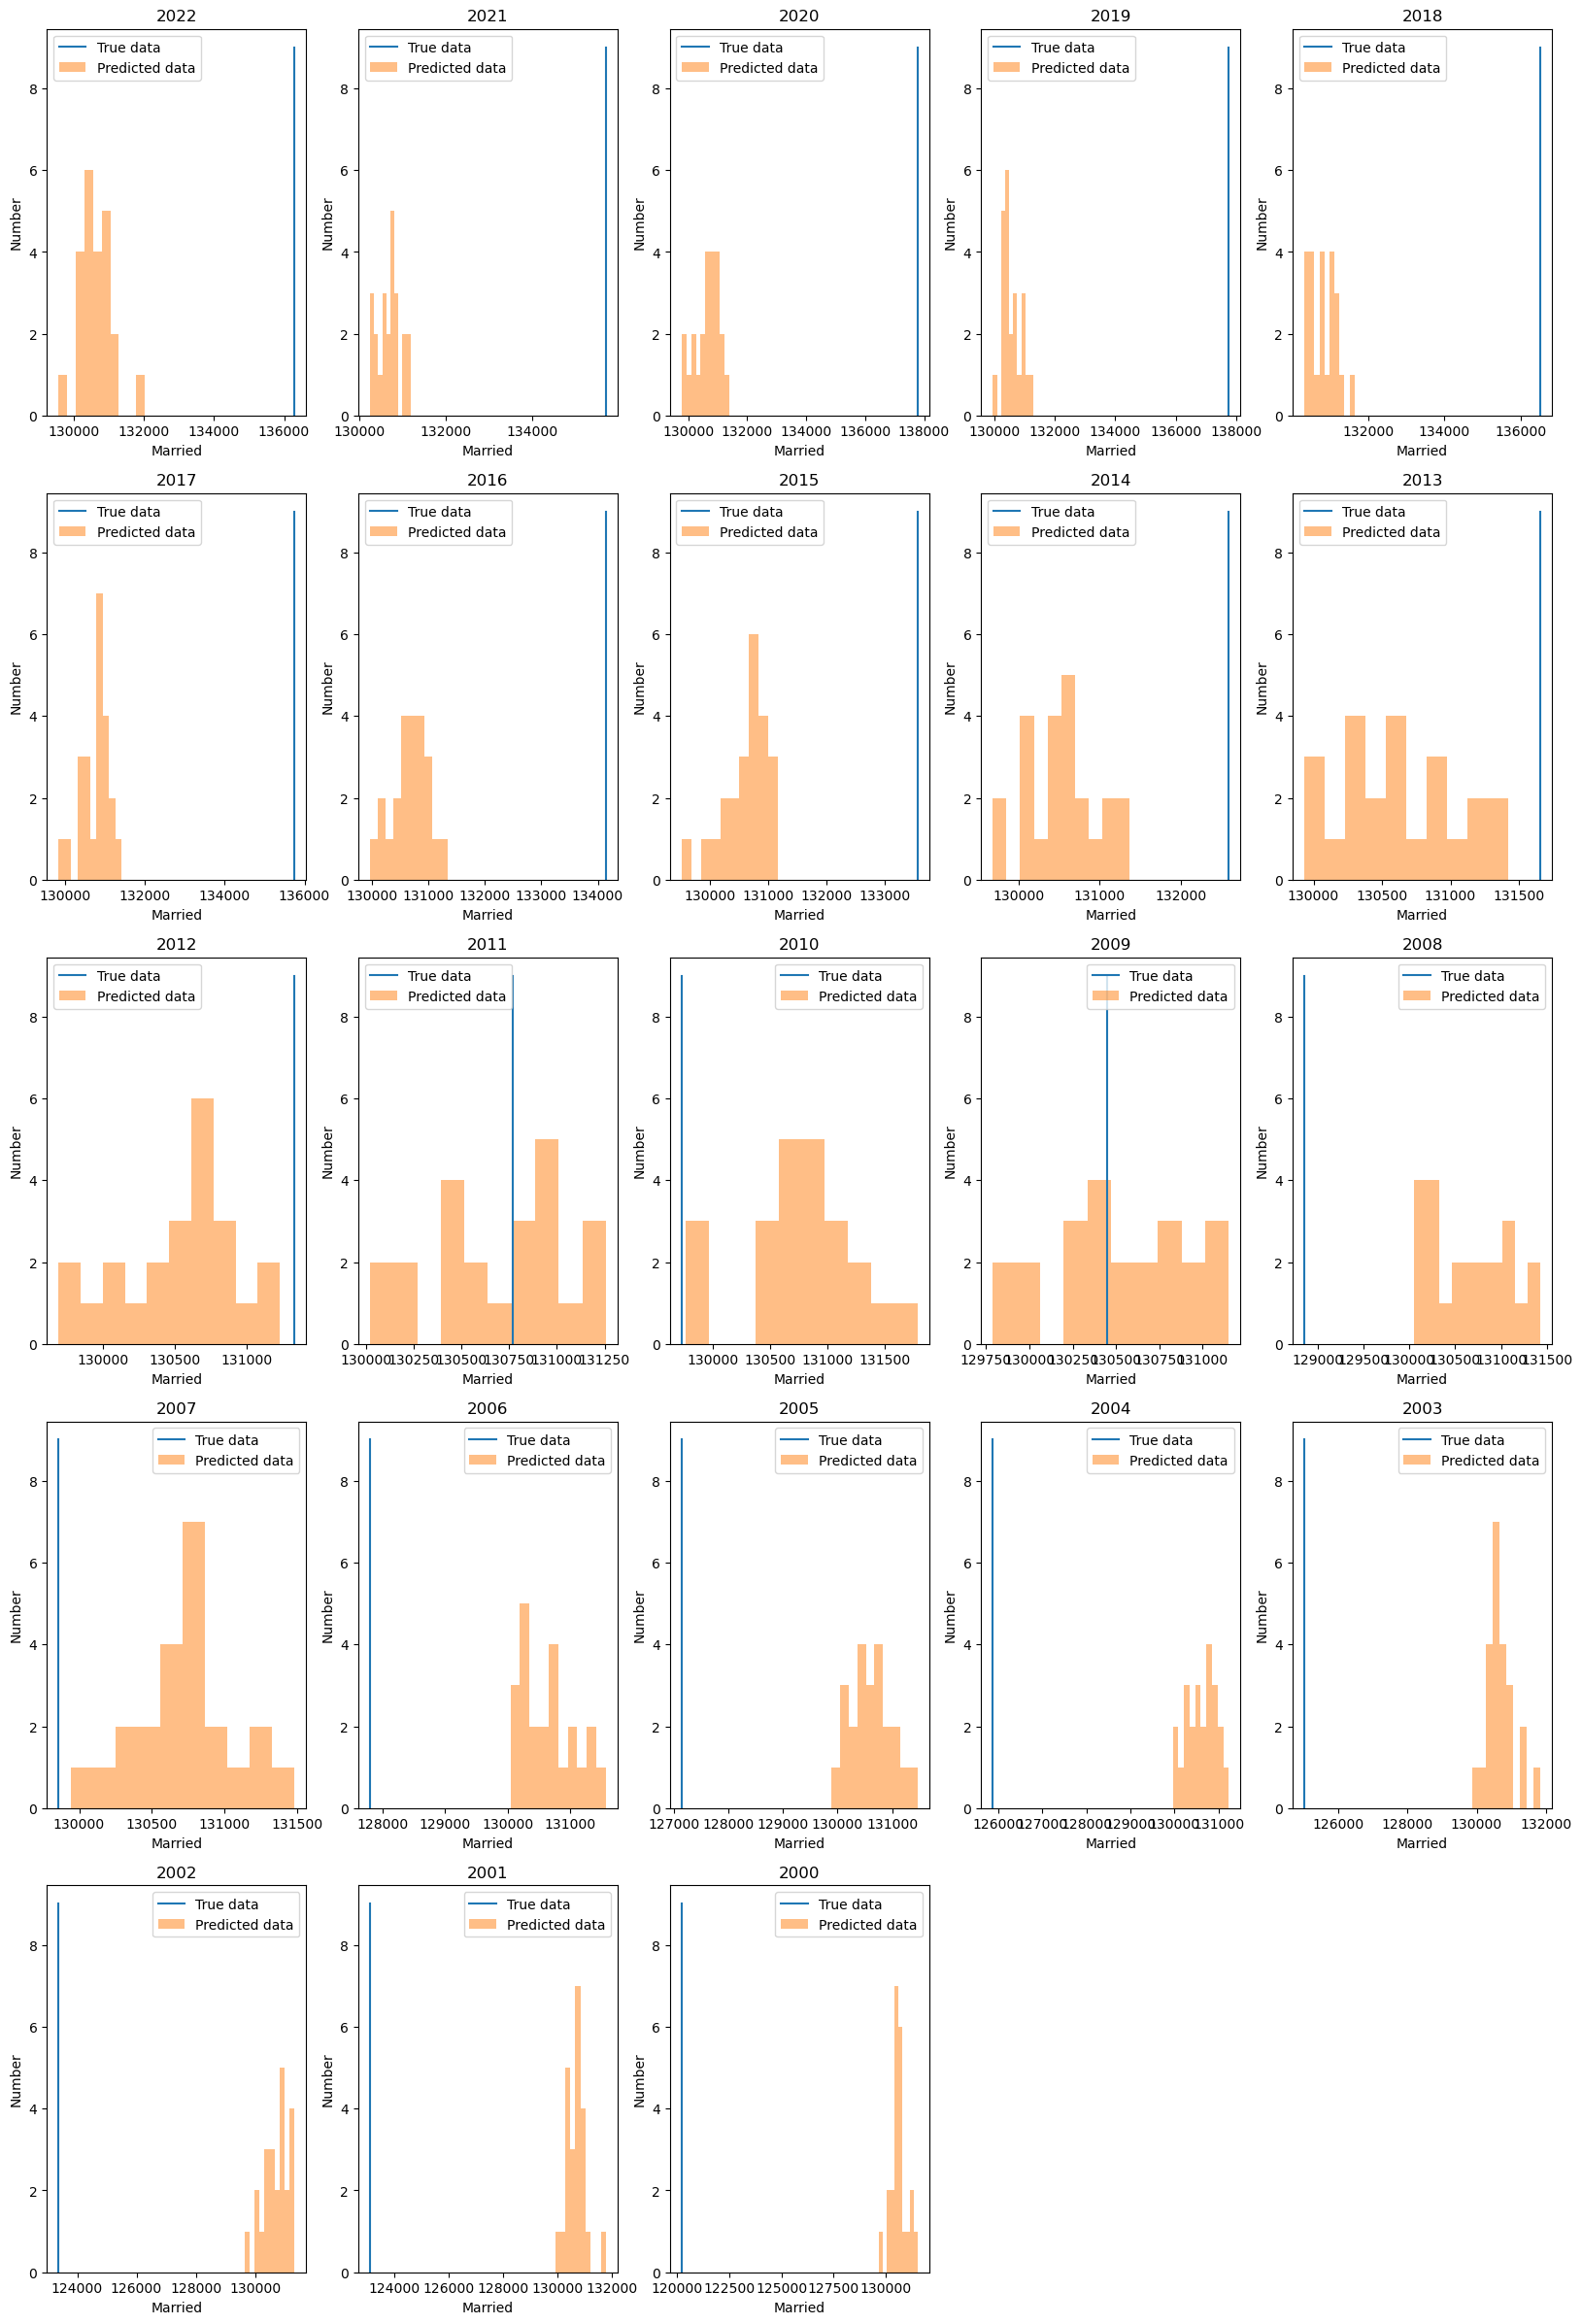

In [ ]:
n=1
plt.figure(figsize=(20,30))
for i in range(len(df)):
    plt.subplot(5,5,n)
    plt.plot([df['Married'][i]]*10, range(0,10), label= 'True data')
    plt.hist(fit_tri.y_sim[i], bins=10, alpha = 0.5, label = 'Predicted data')
    plt.title(df['Year'][i])
    plt.ylabel('Number')
    plt.xlabel('Married')
    plt.legend()
    n+=1

plt.show()